In [35]:

#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import random





In [36]:
#Loading the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [41]:
print(df.value_counts())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [42]:
#Calculating the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
df['Outcome'].value_counts(normalize=True).apply(lambda x:x*100)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

- The Outcome variable is theclassifier that is used to make predictions if the patient has or does not have diabetes depending on the measurements of the most similar labeled ponts of the given data .Therefore in this case if the outcome shows;

       * 1 = Has Diabetes
       * 0 = Does Not Have Diabetes

   # Exploratory Data Analysis:  PLOTS 
  

In [44]:
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

In [45]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    

# Plotting 
missing_plot(df, 'Outcome')


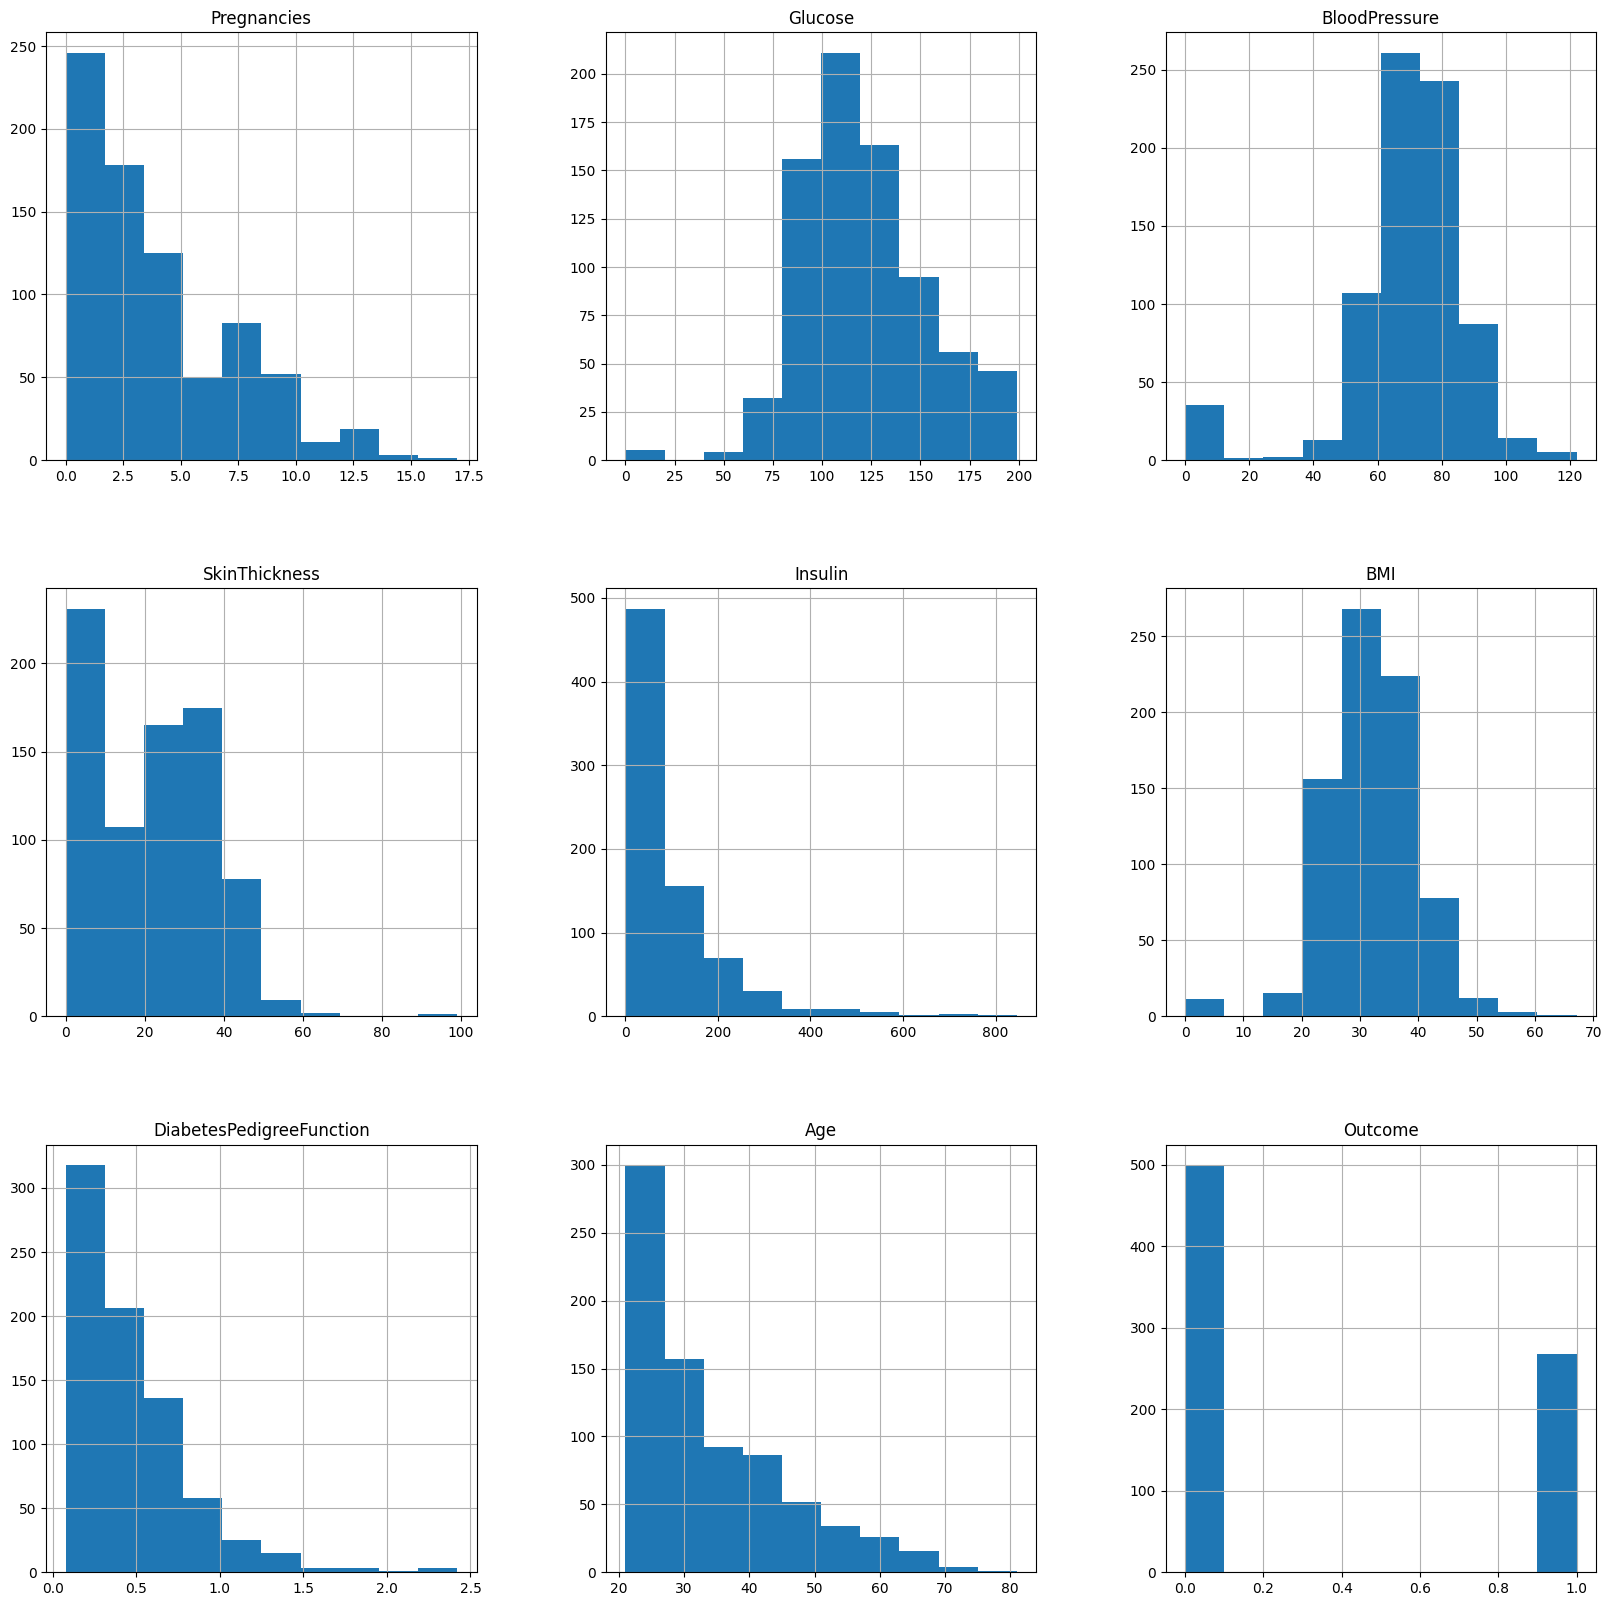

In [46]:
p = df.hist(figsize = (20,20))

In [47]:
# Count Plot for Age

fig = px.bar(x = df['Outcome'].value_counts().index, y = df['Outcome'].value_counts(),
             color = df['Outcome'].value_counts().index)

fig.update_layout(title='Outcome Distribution',
                   xaxis_title='Outcome',
                   yaxis_title='Count')
fig.show()

In [48]:
tmp = df['Outcome'].value_counts()
tmp = tmp.reset_index()
tmp.columns = ['Outcome','count']
fig = px.bar(tmp, x="Outcome", y="count", color='Outcome')
fig.show()

In [49]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    D = df[(df['Outcome'] != 0)]
    H = df[(df['Outcome'] == 0)]
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

plot_distribution('Insulin', 0)
    

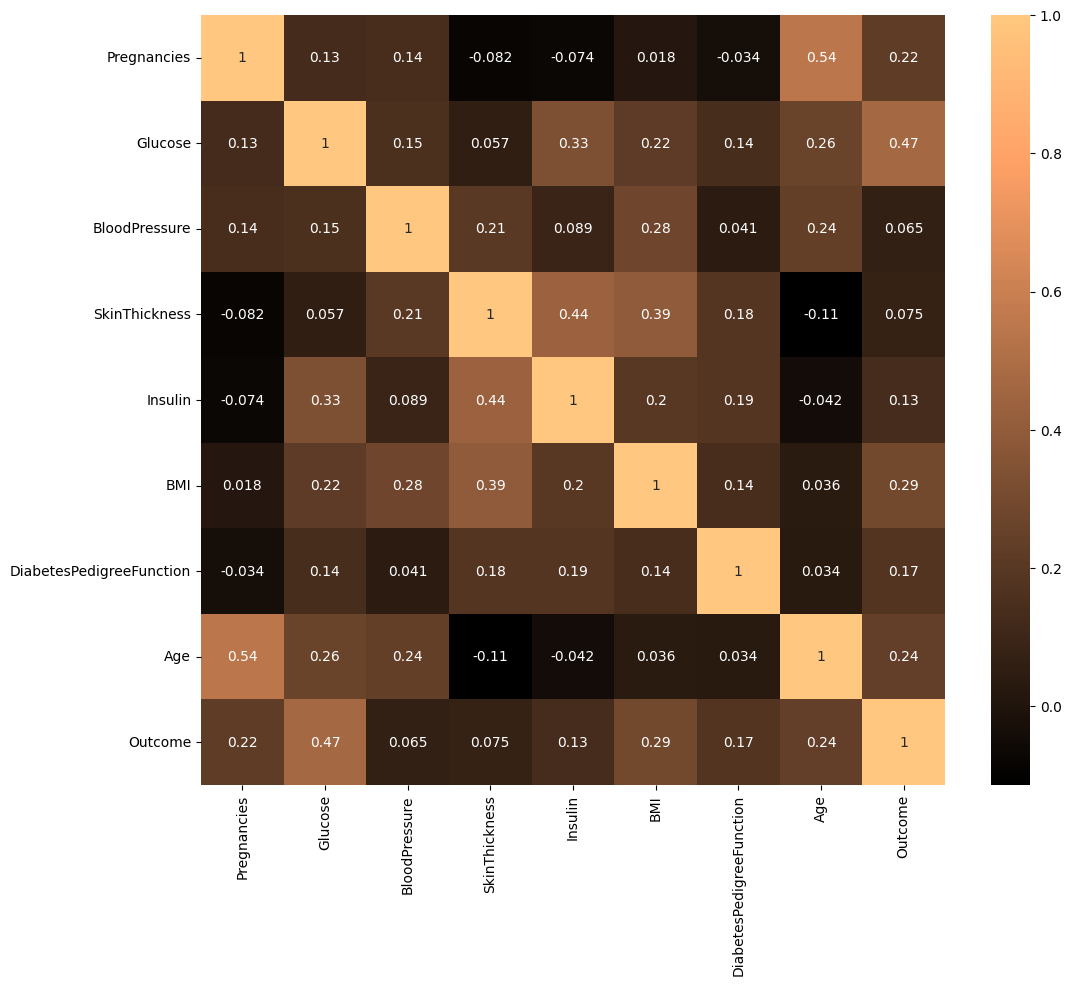

In [50]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True, cmap='copper')

# Scaling the data

In [51]:
#Identifying the Variables

X = df.drop('Outcome', axis=1)
X

y= df['Outcome']
y


from sklearn.model_selection import train_test_split
#Splitting the Dataset
X_train , X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

#Sizes of the Set 
print('The Training Set:', (X_train.shape, y_train.shape))
print('The Test Set:', (X_test.shape, y_test.shape))

The Training Set: ((537, 8), (537,))
The Test Set: ((231, 8), (231,))


In [52]:
#Checking if the Training data set is balanced 
pd.Series(y_train).value_counts(normalize=True)


0    0.662942
1    0.337058
Name: Outcome, dtype: float64

In [53]:
#Analysing the Testing Set
pd.Series(y_test).value_counts(normalize=True)

0    0.623377
1    0.376623
Name: Outcome, dtype: float64

# PREDICTIONS

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
print(X_train)

[[-0.53788077 -0.98266127  1.07584045 ...  0.19662751 -0.51280558
   0.74882677]
 [ 0.06137644  0.74886132  0.81461495 ... -0.39218237 -0.8218938
  -0.52209603]
 [ 1.85914807 -0.31435431  0.03093844 ... -0.57138538 -0.96593491
   0.57937039]
 ...
 [-0.23825217 -0.16246636  0.23991884 ... -0.72498795 -1.06796403
  -0.77628059]
 [-0.83750938 -1.01303886 -2.05886558 ...  2.94867368  0.09936914
  -0.60682422]
 [ 0.36100504 -0.77001815  0.23991884 ...  0.20942772  1.60279824
   0.83355495]]


In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6883116883116883

In [84]:
#predictions on The Test set
y_pred = knn.predict(X_test)
y_pred

#The Predictions of the Training Set
y_train_pred = knn.predict(X_train)
y_train_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [58]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(y_test)
test_scores_ind = [i for i, v in enumerate(y_test) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


Max test score 100 % and k = [4, 8, 13, 15, 20, 21, 24, 26, 28, 29, 30, 35, 37, 41, 42, 43, 45, 49, 52, 64, 67, 70, 71, 72, 74, 77, 78, 80, 82, 85, 86, 88, 89, 92, 97, 101, 102, 103, 107, 108, 112, 115, 118, 120, 126, 128, 131, 132, 136, 138, 139, 140, 143, 145, 148, 149, 150, 151, 153, 155, 159, 164, 166, 168, 174, 175, 176, 178, 179, 180, 186, 193, 195, 196, 200, 203, 204, 207, 209, 210, 213, 214, 216, 220, 224, 225, 228]


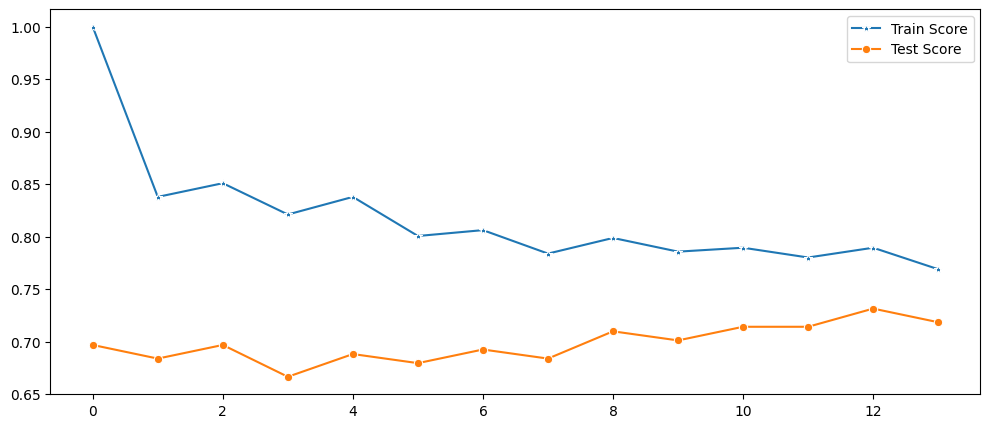

In [59]:
test_score_list = []
train_score_list = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    test_score_list.append(knn.score(X_test, y_test))
    train_score_list.append(knn.score(X_train, y_train))
    
plt.figure(figsize=(12,5))
p = sns.lineplot(train_score_list,marker='*',label='Train Score')
p = sns.lineplot(test_score_list,marker='o',label='Test Score')



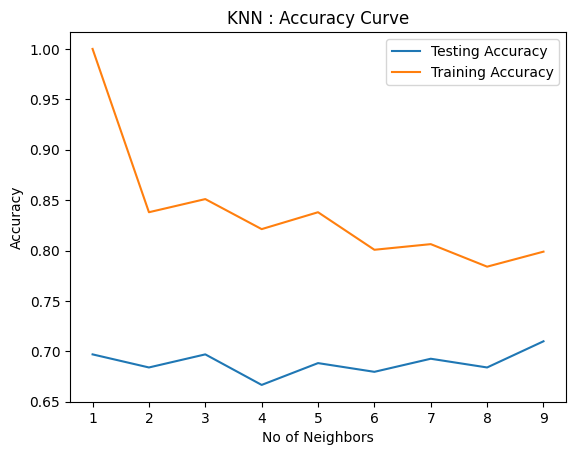

In [60]:
#instead of randomly selecting the values of n_neighbors, its better to plot the accuracy curve and then select the value of n_neighbors.
import matplotlib.pyplot as plt
import pylab
import numpy as np
neighbors  = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
plt.title('KNN : Accuracy Curve')
plt.plot(neighbors,test_accuracy,label = 'Testing Accuracy')
plt.plot(neighbors,train_accuracy,label = 'Training Accuracy')
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
pylab.legend(loc = 'upper right')
plt.show()

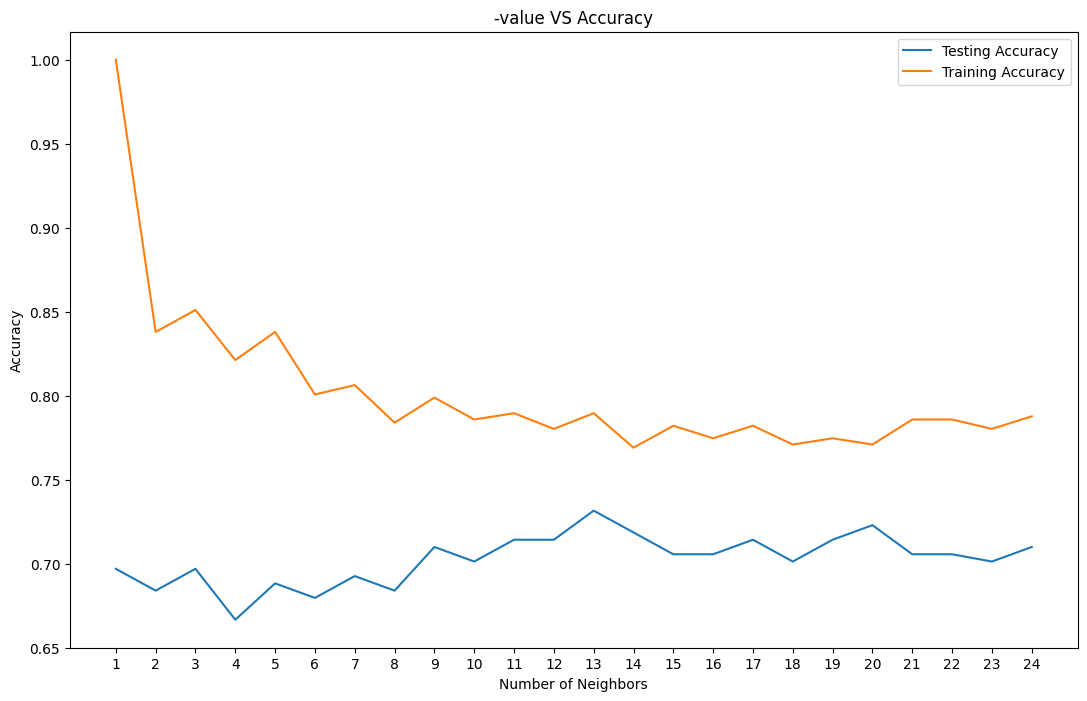

Best accuracy is 0.7316017316017316 with K = 13


In [61]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

0.3116883116883117

In [63]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

#The Accuracy Scores 

print('The Accuracy Scores of the Training Set: {:.3}'.format(knn.score(X_train,y_train)*100))
print('The Accuracy Scores of the Test Set: {:.3}'.format(knn.score(X_test,y_test)*100))
print('The Accuracy of the model: {:.3}'.format(accuracy_score(y_test, y_pred)*100))
print('Traing Set Predictions Accuracy: {:.3}'.format(accuracy_score(y_train_pred, y_train)*100))

The Accuracy Scores of the Training Set: 78.8
The Accuracy Scores of the Test Set: 71.0
The Accuracy of the model: 68.8
Traing Set Predictions Accuracy: 83.8


In [64]:
from sklearn.pipeline import Pipeline

Pipeline = X
Pipeline

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [65]:
#Selecting The K values
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

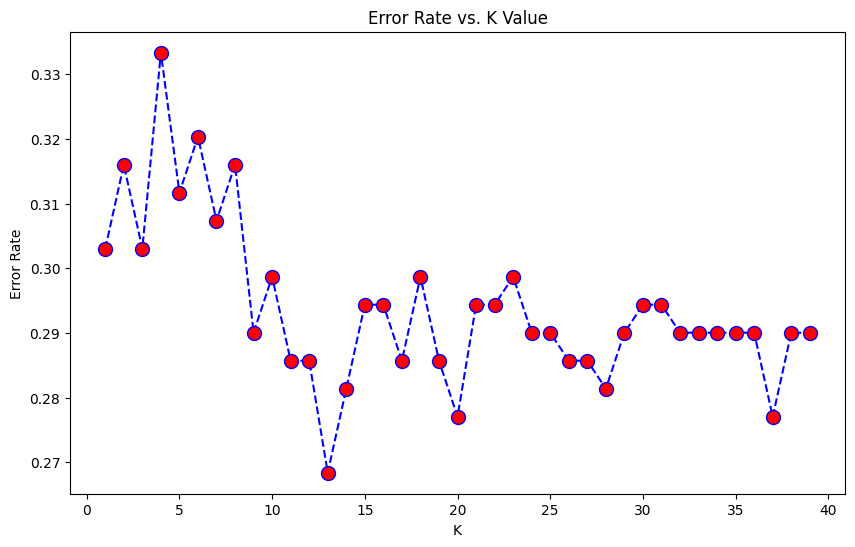

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,137,7,144
1,60,27,87
All,197,34,231


# CLASSIFICATION REPORT

- Classification Report mostly includes Precision, Recall and F1 Score ;
    
    *Precision - 
      =>Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
    
    Accuracy of positive predictions.
        = TP/(TP + FP)

    *Recall - 
        =>Recall is the ratio of correctly predicted positive observations to the all observations in actual class
    Fraction of positives that were correctly identified.
        = TP/(TP+FN)
        
    *F1 Score - 
    =>F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.
         = 2 x (precision x recall)/(precision + recall)
    

In [68]:
# Import The Classification Report 

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80       144
           1       0.79      0.31      0.45        87

    accuracy                           0.71       231
   macro avg       0.74      0.63      0.62       231
weighted avg       0.73      0.71      0.67       231



In [69]:
#Classification Report
print("RECALL SCORE:")
print("Train Recall : ",metrics.recall_score(y_train,y_train_pred)*100)
print("Test Recall : ", metrics.recall_score(y_test,y_pred)*100)
print("PRECISION SCORE:")
print("Train Precision : ",metrics.precision_score(y_train,y_train_pred)*100)
print("Test Precision : ",metrics.precision_score(y_test,y_pred)*100)
print("F1 SCORE:")
print("Train Accuracy :", metrics.f1_score(y_train,y_train_pred)*100)
print("Test Accuracy :", metrics.f1_score(y_test,y_pred)*100)


RECALL SCORE:
Train Recall :  74.58563535911603
Test Recall :  31.03448275862069
PRECISION SCORE:
Train Precision :  76.70454545454545
Test Precision :  79.41176470588235
F1 SCORE:
Train Accuracy : 75.63025210084034
Test Accuracy : 44.628099173553714


In [70]:
# ACCURACY SCORE

acc = accuracy_score(y_test,y_pred, normalize=True)*100
print('\nCV accuracy for k = %d is %d%%' % (5, acc))



CV accuracy for k = 5 is 70%


In [71]:
#Let’s measure this model's RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:

from sklearn.metrics import mean_squared_error
knn_mse = mean_squared_error(y_test, y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.5385566730097122

   # BETTER EVALUATION WITH CROSS VALIDATION

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")

array([0.73184358, 0.7877095 , 0.72625698])

In [73]:
knn_scores = cross_val_score(knn, X_train, y_train, 
                             scoring='neg_mean_squared_error', cv=5)
knn_rmse_scores = np.sqrt(-knn_scores)


In [74]:
def display_scores(scores):
    print('Scores:', knn_scores)
    print('Mean:', knn_scores)
    print('Standard deviation:', knn_scores.std())
    
display_scores(knn_rmse_scores)    

Scores: [-0.27777778 -0.22222222 -0.28037383 -0.29906542 -0.25233645]
Mean: [-0.27777778 -0.22222222 -0.28037383 -0.29906542 -0.25233645]
Standard deviation: 0.026612782520691748


In [75]:
#classifier that just classifies every single image in the “not-5” class:

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

     
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.69273743, 0.62011173, 0.67597765])

# Hyperparameter Tuning Using GridSearchCV

In [76]:
# Importing The Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}



knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
knn_cv= GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.score(X_test, y_test)

0.7056277056277056

In [77]:
knn_cv.best_params_

{'n_neighbors': 22}

In [78]:
knn_cv.best_score_

0.7598823122187609

In [79]:
knn_cv.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=22)

In [80]:
# The evaluation scores

cvres = knn_cv.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(mean_score), params)

0.8434587349662471 {'n_neighbors': 1}
0.8367944737786494 {'n_neighbors': 2}
0.8641448252401154 {'n_neighbors': 3}
0.8543659380554567 {'n_neighbors': 4}
0.856530711541089 {'n_neighbors': 5}
0.8533119156190702 {'n_neighbors': 6}
0.8684401536375335 {'n_neighbors': 7}
0.8522362820909986 {'n_neighbors': 8}
0.8587303369646371 {'n_neighbors': 9}
0.8641548391439594 {'n_neighbors': 10}
0.8619590171109962 {'n_neighbors': 11}
0.8598079108005757 {'n_neighbors': 12}
0.8609042393788106 {'n_neighbors': 13}
0.8565711225109655 {'n_neighbors': 14}
0.8598280395105503 {'n_neighbors': 15}
0.8641748666035296 {'n_neighbors': 16}
0.8663251184166281 {'n_neighbors': 17}
0.8684999381749544 {'n_neighbors': 18}
0.8695455022070127 {'n_neighbors': 19}
0.8717023604373846 {'n_neighbors': 20}
0.8674032336105794 {'n_neighbors': 21}
0.8717122875231029 {'n_neighbors': 22}
0.8695554539160218 {'n_neighbors': 23}
0.8652456598683868 {'n_neighbors': 24}
0.8706096899646234 {'n_neighbors': 25}
0.8641448252401154 {'n_neighbors': 

In [85]:
y_pred = knn.predict(X_test)
final_rmse = mean_squared_error(y_test, y_pred)
final_rmse

from scipy import stats
confidence = 0.95
squared_errors = (y_pred - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                              loc= squared_errors.mean(),
                              scale = stats.sem(squared_errors)))

array([0.50150935, 0.60980735])

# USING LIGHTGBM

In [86]:
def model_performance(model, subtitle) :   
    #Kfold
    cv = KFold(n_splits=5,shuffle=True, random_state = 42)
    y_real = []
    y_proba = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    
    for train,test in cv.split(X,y):
        model.fit(X.iloc[train], y.iloc[train])
        pred_proba = model.predict_proba(X.iloc[test])
        precision, recall, _ = precision_recall_curve(y.iloc[test], pred_proba[:,1])
        y_real.append(y.iloc[test])
        y_proba.append(pred_proba[:,1])
        fpr, tpr, t = roc_curve(y[test], pred_proba[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc) 
    
    # Confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=5)
    conf_matrix = confusion_matrix(y, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)
    
    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='black'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    #Roc curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)

    trace3 = go.Scatter(x=mean_fpr, y=mean_tpr,
                        name = "Roc : " ,
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    #Precision - recall curve
    y_real = y
    y_proba = np.concatenate(y_proba)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)

    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    mean_auc=round(mean_auc,3)
    #Subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False,
                          specs=[[{}, {}], 
                                 [{}, {}]],
                          subplot_titles=('Confusion Matrix',
                                          'Metrics',
                                          'ROC curve'+" "+ '('+ str(mean_auc)+')',
                                          'Precision - Recall curve',
                                          ))
    #Trace and layout
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report (5 folds)</b><br>'+subtitle,
                        autosize = False, height = 830, width = 830,
                        plot_bgcolor = 'black',
                        paper_bgcolor = 'black',
                        margin = dict(b = 195), font=dict(color='white'))
    fig["layout"]["xaxis1"].update(color = 'white')
    fig["layout"]["yaxis1"].update(color = 'white')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1], color = 'white')))
    fig["layout"]["yaxis2"].update(color = 'white')
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"), color = 'white')
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"),color = 'white')
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05],color = 'white')
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05],color = 'white')
    for i in fig['layout']['annotations']:
        i['font'] = titlefont=dict(color='white', size = 14)
    py.iplot(fig)



In [87]:
def scores_table(model, subtitle):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    res = []
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        res.append(scores)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df= df.rename(columns={0: 'accuracy', 1:'precision', 2:'recall',3:'f1',4:'roc_auc'})

    trace = go.Table(
        header=dict(values=['<b>Fold', '<b>Accuracy', '<b>Precision', '<b>Recall', '<b>F1 score', '<b>Roc auc'],
                    line = dict(color='#7D7F80'),
                    fill = dict(color='#a1c3d1'),
                    align = ['center'],
                     font = dict(size = 15)),
        cells=dict(values=[('1','2','3','4','5','mean', 'std'),
                           np.round(df['accuracy'],3),
                           np.round(df['precision'],3),
                           np.round(df['recall'],3),
                           np.round(df['f1'],3),
                           np.round(df['roc_auc'],3)],
                   line = dict(color='#7D7F80'),
                   fill = dict(color='#EDFAFF'),
                   align = ['center'], font = dict(size = 15)))

    layout = dict(width=800, height=400, title = '<b>Cross Validation - 5 folds</b><br>'+subtitle, font = dict(size = 15))
    fig = dict(data=[trace], layout=layout)

    py.iplot(fig, filename = 'styled_table')


In [88]:

import lightgbm as lgbm
# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

random_state=42

fit_params = {"early_stopping_rounds" : 100, 
             "eval_metric" : 'auc', 
             "eval_set" : [(X,y)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50),
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
#number of combinations
n_iter = 300

#intialize lgbm and lunch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **fit_params)
opt_parameters =  grid_search.best_params_
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)



NameError: name 'RandomizedSearchCV' is not defined

In [89]:
model_performance(lgbm_clf, 'LightGBM')
scores_table(lgbm_clf, 'LightGBM')



NameError: name 'KFold' is not defined